In [144]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
    {"V1" : V1,
     "V2" : V2,
     "V3" : V3}
)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [88]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [90]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [92]:
df.isnull().sum().sum() #toplam eksik deger

7

In [94]:
df.isnull() #True-False Sorgulamasi

,V1,V2,V3
0,False,False,True
1,False,True,False
2,False,False,False
3,True,False,False
4,False,False,False
5,False,True,False
6,True,True,True
7,False,False,False
8,False,False,False


In [96]:
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [98]:
df[df.notnull().all(axis=1)] #hepsi dolu olanlari getir sutunlara gore

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [100]:
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]
#farkli bi yazma sekli (uzun)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [102]:
df.dropna() #gecici

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [104]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [106]:
df.dropna(inplace = True) #kalici

In [108]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [110]:
#basit deger atama

In [112]:
df["V1"]

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [114]:
df["V1"].mean()

9.25

In [116]:
df["V1"].fillna(df["V1"].mean())

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [118]:
df["V1"].fillna(0)

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [120]:
#df'i baslangic degerine getiriyorum her sefer ilk satirdan calistirarak
df.apply(lambda x:x.fillna(x.mean()),axis=0)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## Eksik Veri Yapisinin Gorsellestirmesi

In [123]:
!pip install missingno

In [124]:
import missingno as msno

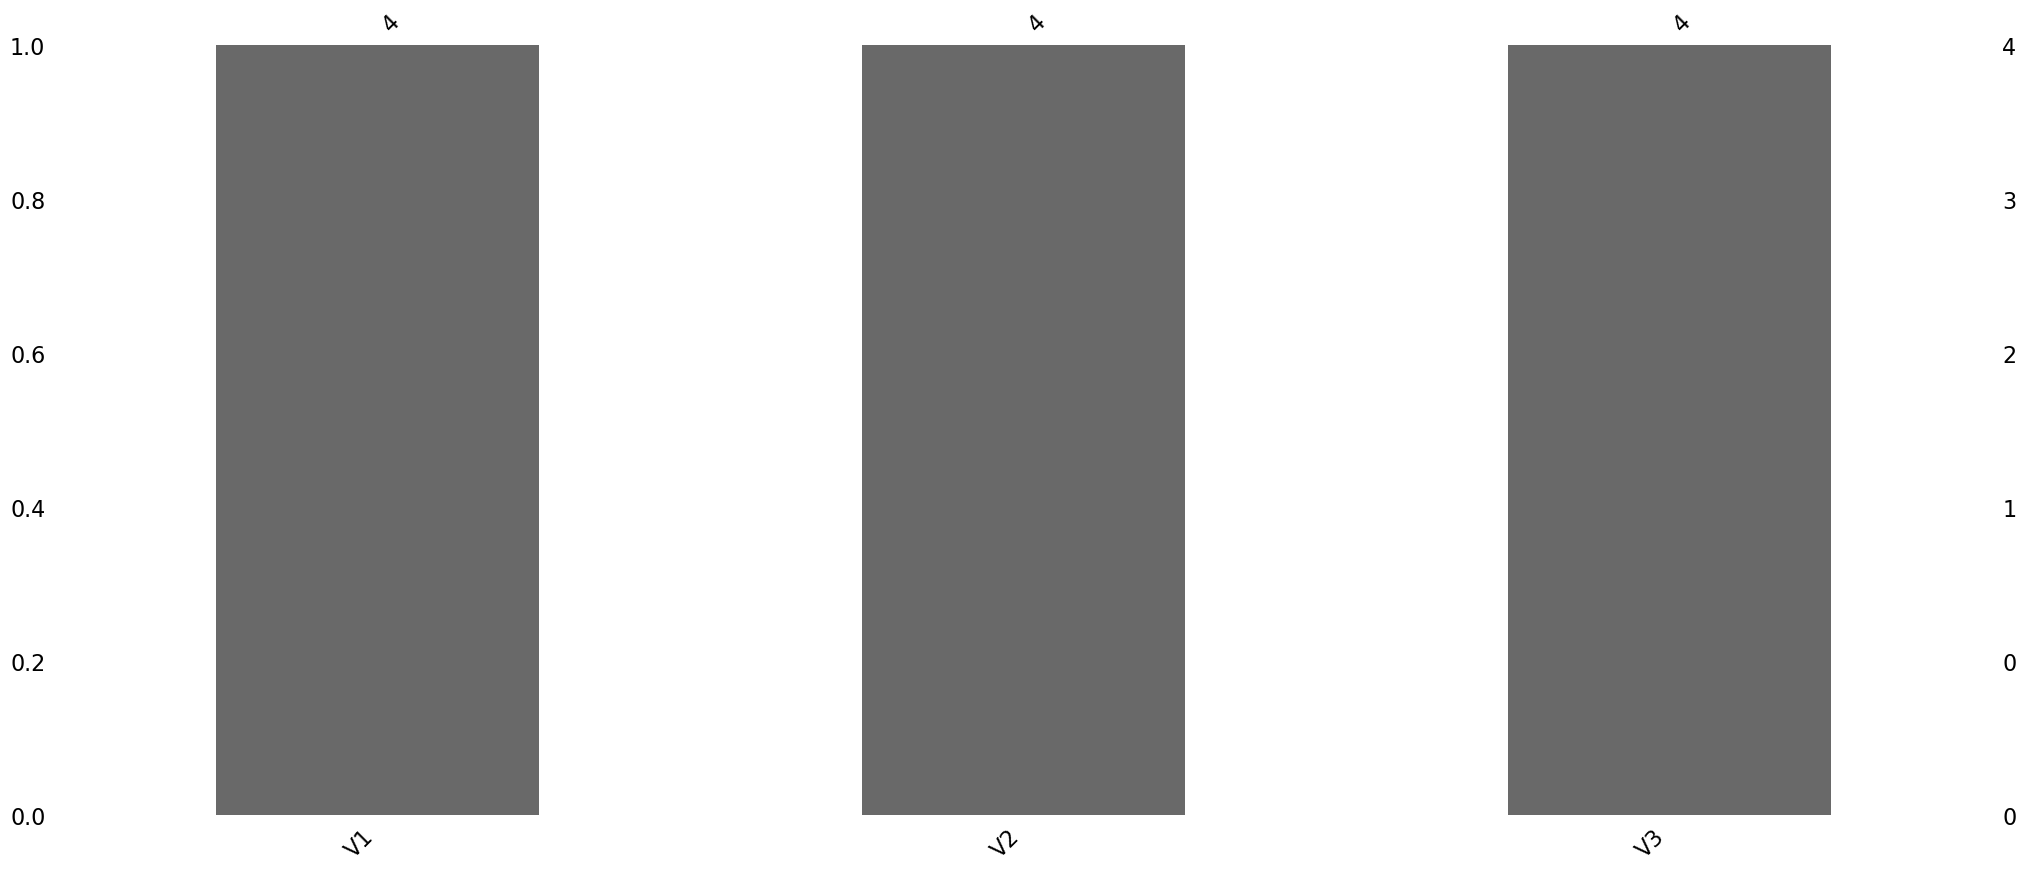

In [125]:
msno.bar(df);

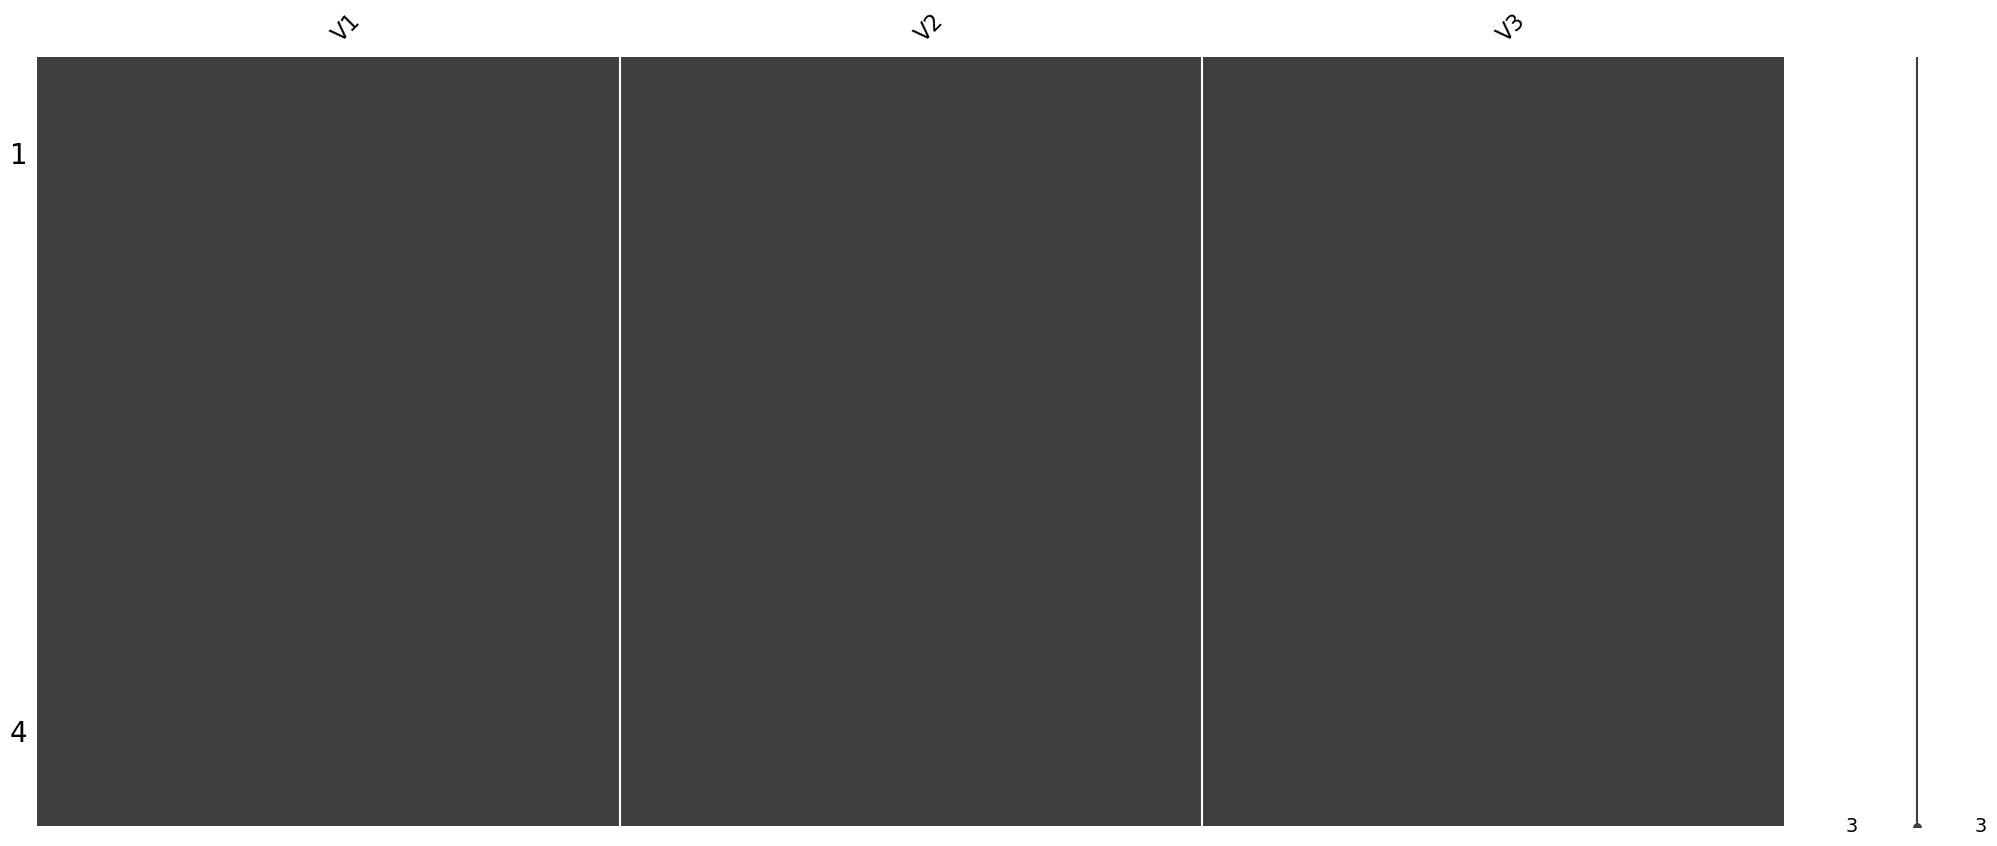

In [126]:
msno.matrix(df);

In [127]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [128]:
import seaborn as sns
df=sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [129]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

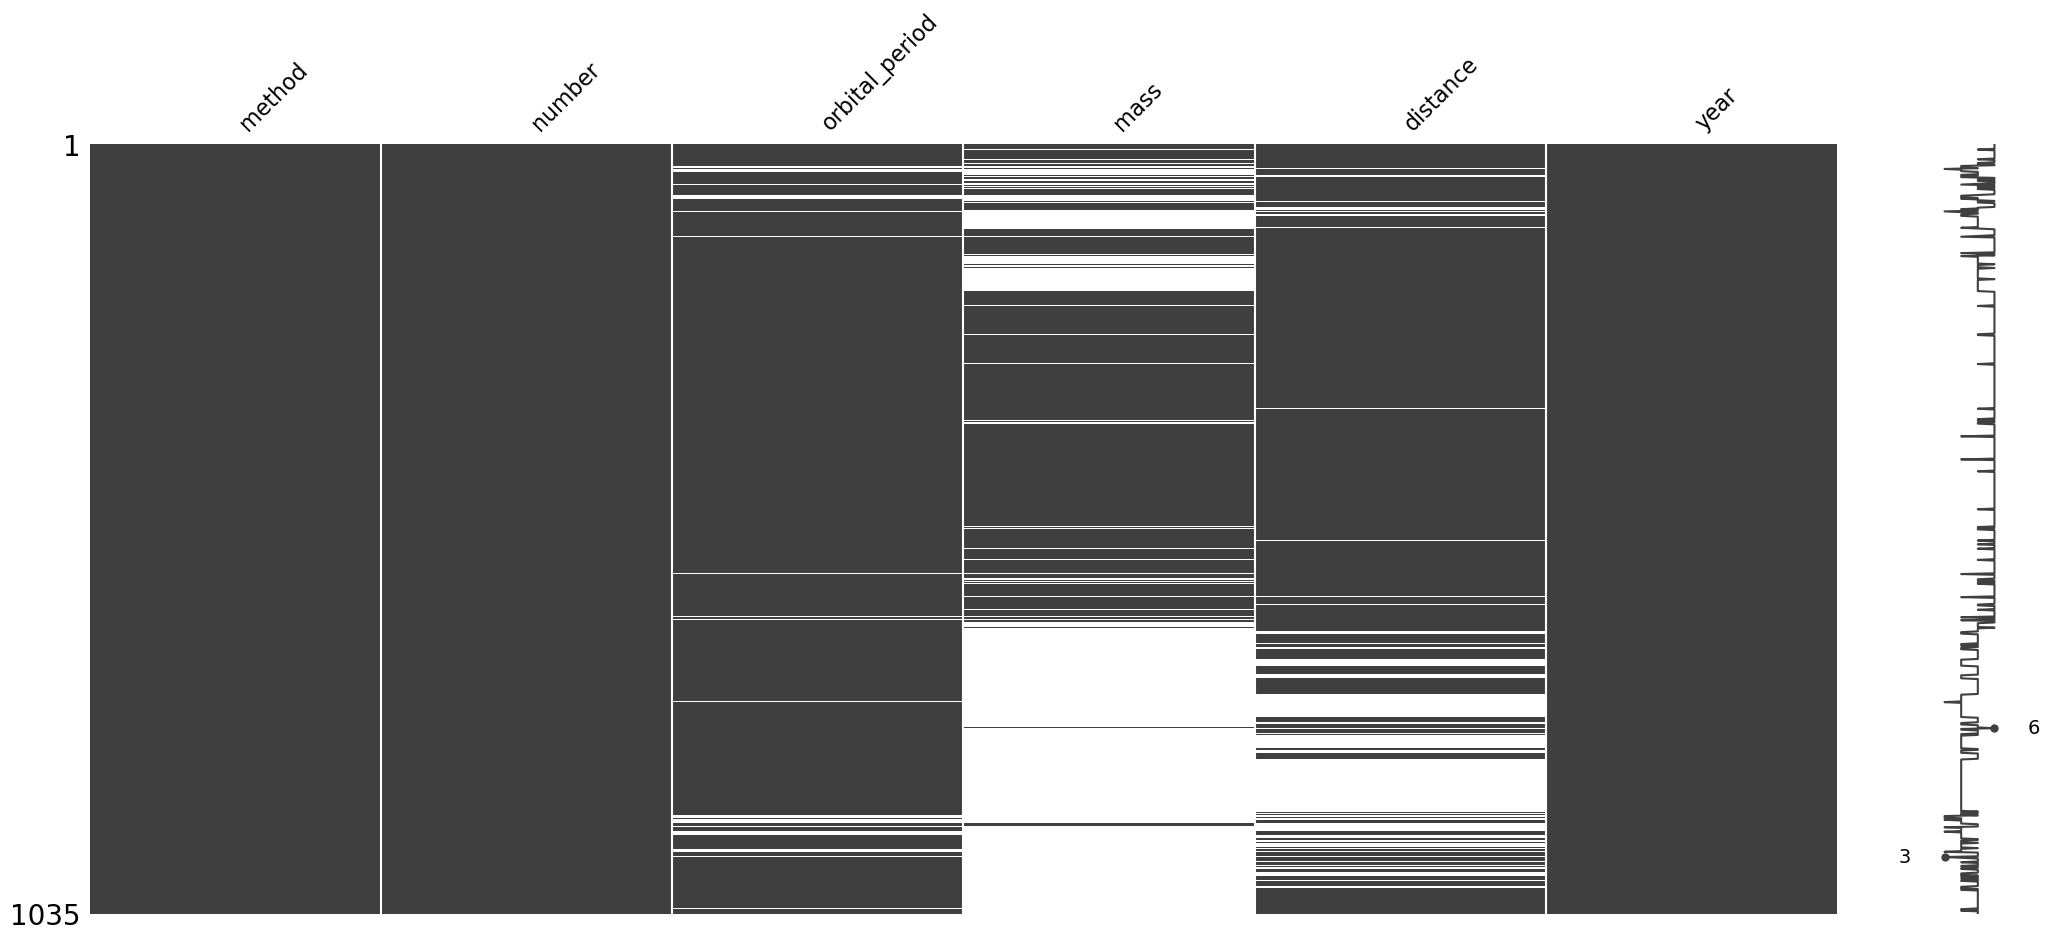

In [130]:
msno.matrix(df); #6tane hepsinin dolu 3 tane hepsinin bos oldugu deger var

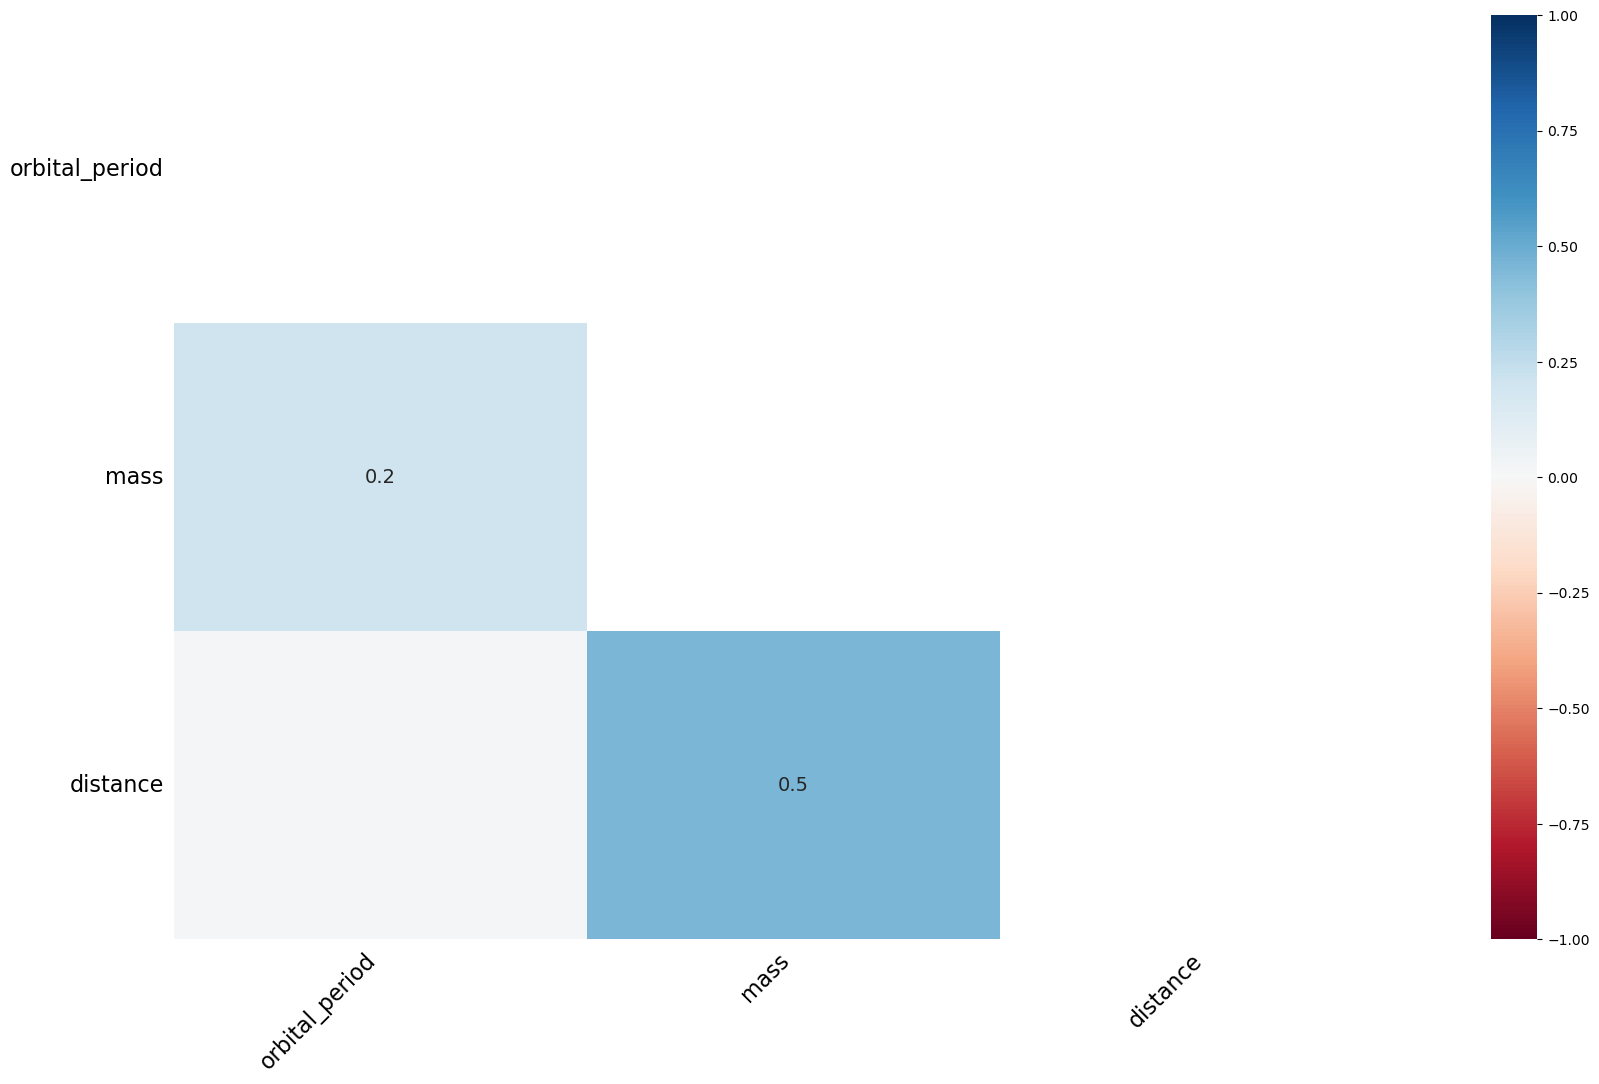

In [131]:
msno.heatmap(df); #0 birbirlerini etkileyen korelasyon yok 1 ise yuksek ihtimalle var

## Silme Yontemi

In [146]:
df.dropna(how="all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [148]:
df.dropna(axis=1)  #degisken anlaminda en az 1 tane na olan degiskenleri sil(hepsinde en az bir var)

""
0
1
2
3
4
5
6
7
8


In [150]:
df.dropna(axis=1,how = "all") #tum degerleri na olan sutunlari siler

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [152]:
#sayisal degiskenlerde atama

In [154]:
df["V1"].fillna(0)

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [156]:
df.apply(lambda x: x.fillna(x.mean()),axis = 0 )

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [158]:
df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [160]:
df.fillna(df.mean()["V1":"V2"]) #v1 ile v2 doldurur

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [162]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [164]:
#ucuncu yol

In [168]:
df.where(pd.notna(df),df.mean(),axis="columns")
#df.where(pd.notna(df), ...) → Eğer bir hücre NaN değilse, orijinal değeri korur. Eğer NaN ise, ikinci parametrede belirtilen değeri kullanır.

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0
